## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  92.652934   802.255236  0.915640   2.069888  740.340725
1  30.055243   865.042987  0.232471   4.300136  203.404471
2  41.438065   132.335009  0.201776  10.955675   49.191579
3  69.467890  1741.973302  0.471158   6.942367  823.619783
4  88.566850   994.543133  0.514287  10.477432  519.042411


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9997944	total: 56.9ms	remaining: 56.8s
1:	learn: 0.9880249	total: 57.3ms	remaining: 28.6s
2:	learn: 0.9776992	total: 58ms	remaining: 19.3s
3:	learn: 0.9660174	total: 58.5ms	remaining: 14.6s
4:	learn: 0.9525492	total: 59.5ms	remaining: 11.8s
5:	learn: 0.9423523	total: 60ms	remaining: 9.94s
6:	learn: 0.9299621	total: 60.5ms	remaining: 8.58s
7:	learn: 0.9162791	total: 61ms	remaining: 7.57s
8:	learn: 0.9040204	total: 61.5ms	remaining: 6.77s
9:	learn: 0.8911973	total: 61.9ms	remaining: 6.13s
10:	learn: 0.8792162	total: 62.6ms	remaining: 5.62s
11:	learn: 0.8652982	total: 63.1ms	remaining: 5.19s
12:	learn: 0.8537122	total: 63.4ms	remaining: 4.82s
13:	learn: 0.8429000	total: 63.9ms	remaining: 4.5s
14:	learn: 0.8312365	total: 64.3ms	remaining: 4.22s
15:	learn: 0.8213025	total: 64.7ms	remaining: 3.98s
16:	learn: 0.8090001	total: 65.3ms	remaining: 3.77s
17:	learn: 0.7982311	total: 65.7ms	remaining: 3.58s
18:	learn: 0.7895066	total: 66.3ms	remaining: 3.42s

110:	learn: 0.2640686	total: 108ms	remaining: 867ms
111:	learn: 0.2608815	total: 109ms	remaining: 864ms
112:	learn: 0.2583059	total: 109ms	remaining: 859ms
113:	learn: 0.2554918	total: 110ms	remaining: 855ms
114:	learn: 0.2530755	total: 110ms	remaining: 849ms
115:	learn: 0.2504192	total: 111ms	remaining: 844ms
116:	learn: 0.2476753	total: 111ms	remaining: 840ms
117:	learn: 0.2453503	total: 112ms	remaining: 835ms
118:	learn: 0.2424637	total: 112ms	remaining: 830ms
119:	learn: 0.2397619	total: 113ms	remaining: 826ms
120:	learn: 0.2369289	total: 113ms	remaining: 822ms
121:	learn: 0.2340727	total: 114ms	remaining: 819ms
122:	learn: 0.2312279	total: 114ms	remaining: 815ms
123:	learn: 0.2292949	total: 115ms	remaining: 811ms
124:	learn: 0.2263245	total: 115ms	remaining: 807ms
125:	learn: 0.2236314	total: 116ms	remaining: 803ms
126:	learn: 0.2213429	total: 116ms	remaining: 799ms
127:	learn: 0.2189505	total: 117ms	remaining: 795ms
128:	learn: 0.2169094	total: 117ms	remaining: 791ms
129:	learn: 

290:	learn: 0.0554874	total: 187ms	remaining: 455ms
291:	learn: 0.0551107	total: 187ms	remaining: 454ms
292:	learn: 0.0547243	total: 188ms	remaining: 453ms
293:	learn: 0.0544133	total: 188ms	remaining: 452ms
294:	learn: 0.0540586	total: 189ms	remaining: 451ms
295:	learn: 0.0537693	total: 189ms	remaining: 450ms
296:	learn: 0.0533564	total: 190ms	remaining: 449ms
297:	learn: 0.0530268	total: 190ms	remaining: 448ms
298:	learn: 0.0527299	total: 191ms	remaining: 447ms
299:	learn: 0.0524315	total: 191ms	remaining: 446ms
300:	learn: 0.0521087	total: 192ms	remaining: 445ms
301:	learn: 0.0518144	total: 192ms	remaining: 444ms
302:	learn: 0.0514954	total: 192ms	remaining: 442ms
303:	learn: 0.0512064	total: 193ms	remaining: 442ms
304:	learn: 0.0509227	total: 193ms	remaining: 441ms
305:	learn: 0.0505567	total: 194ms	remaining: 439ms
306:	learn: 0.0501725	total: 194ms	remaining: 438ms
307:	learn: 0.0498226	total: 195ms	remaining: 437ms
308:	learn: 0.0494709	total: 195ms	remaining: 436ms
309:	learn: 

524:	learn: 0.0194504	total: 291ms	remaining: 263ms
525:	learn: 0.0193514	total: 291ms	remaining: 262ms
526:	learn: 0.0193004	total: 292ms	remaining: 262ms
527:	learn: 0.0192504	total: 292ms	remaining: 261ms
528:	learn: 0.0191262	total: 293ms	remaining: 261ms
529:	learn: 0.0190172	total: 293ms	remaining: 260ms
530:	learn: 0.0189099	total: 293ms	remaining: 259ms
531:	learn: 0.0188616	total: 294ms	remaining: 259ms
532:	learn: 0.0187561	total: 294ms	remaining: 258ms
533:	learn: 0.0187089	total: 295ms	remaining: 257ms
534:	learn: 0.0186080	total: 295ms	remaining: 257ms
535:	learn: 0.0185086	total: 296ms	remaining: 256ms
536:	learn: 0.0184621	total: 296ms	remaining: 255ms
537:	learn: 0.0183643	total: 296ms	remaining: 255ms
538:	learn: 0.0182679	total: 297ms	remaining: 254ms
539:	learn: 0.0182184	total: 297ms	remaining: 253ms
540:	learn: 0.0181236	total: 298ms	remaining: 253ms
541:	learn: 0.0180753	total: 298ms	remaining: 252ms
542:	learn: 0.0179820	total: 299ms	remaining: 252ms
543:	learn: 

703:	learn: 0.0097930	total: 368ms	remaining: 155ms
704:	learn: 0.0097567	total: 369ms	remaining: 154ms
705:	learn: 0.0097358	total: 369ms	remaining: 154ms
706:	learn: 0.0097074	total: 369ms	remaining: 153ms
707:	learn: 0.0096966	total: 370ms	remaining: 153ms
708:	learn: 0.0096610	total: 370ms	remaining: 152ms
709:	learn: 0.0096503	total: 371ms	remaining: 151ms
710:	learn: 0.0096227	total: 371ms	remaining: 151ms
711:	learn: 0.0095801	total: 372ms	remaining: 150ms
712:	learn: 0.0095697	total: 372ms	remaining: 150ms
713:	learn: 0.0095402	total: 372ms	remaining: 149ms
714:	learn: 0.0095055	total: 373ms	remaining: 149ms
715:	learn: 0.0094863	total: 373ms	remaining: 148ms
716:	learn: 0.0094577	total: 373ms	remaining: 147ms
717:	learn: 0.0094237	total: 374ms	remaining: 147ms
718:	learn: 0.0094138	total: 374ms	remaining: 146ms
719:	learn: 0.0093937	total: 375ms	remaining: 146ms
720:	learn: 0.0093740	total: 375ms	remaining: 145ms
721:	learn: 0.0093545	total: 375ms	remaining: 145ms
722:	learn: 

942:	learn: 0.0049997	total: 472ms	remaining: 28.5ms
943:	learn: 0.0049916	total: 473ms	remaining: 28ms
944:	learn: 0.0049707	total: 473ms	remaining: 27.5ms
945:	learn: 0.0049628	total: 474ms	remaining: 27ms
946:	learn: 0.0049381	total: 474ms	remaining: 26.5ms
947:	learn: 0.0049303	total: 475ms	remaining: 26ms
948:	learn: 0.0049226	total: 475ms	remaining: 25.5ms
949:	learn: 0.0049069	total: 476ms	remaining: 25ms
950:	learn: 0.0048993	total: 476ms	remaining: 24.5ms
951:	learn: 0.0048754	total: 477ms	remaining: 24ms
952:	learn: 0.0048679	total: 477ms	remaining: 23.5ms
953:	learn: 0.0048527	total: 477ms	remaining: 23ms
954:	learn: 0.0048453	total: 478ms	remaining: 22.5ms
955:	learn: 0.0048228	total: 478ms	remaining: 22ms
956:	learn: 0.0048155	total: 479ms	remaining: 21.5ms
957:	learn: 0.0047928	total: 479ms	remaining: 21ms
958:	learn: 0.0047856	total: 480ms	remaining: 20.5ms
959:	learn: 0.0047786	total: 480ms	remaining: 20ms
960:	learn: 0.0047637	total: 481ms	remaining: 19.5ms
961:	learn:

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

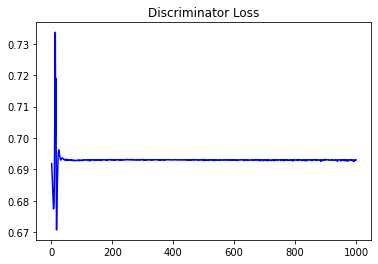

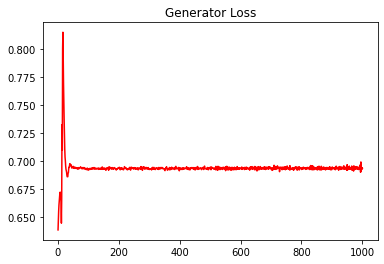

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.011339373472161336


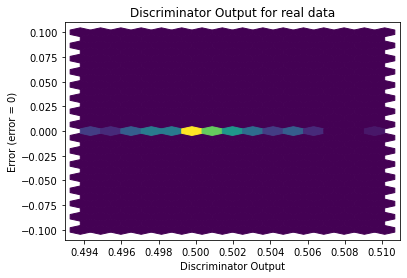

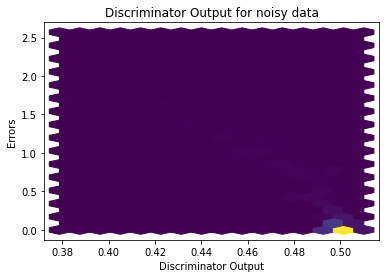

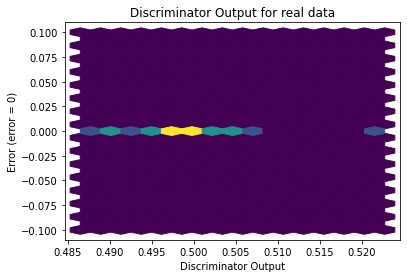

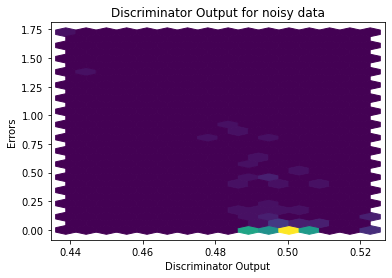

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


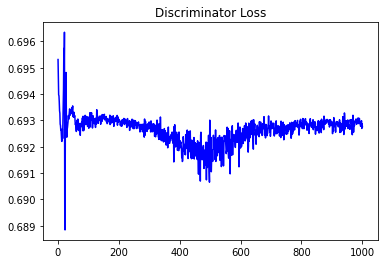

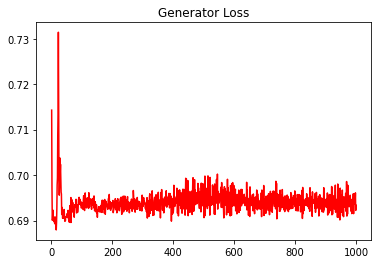

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.007942680600540743


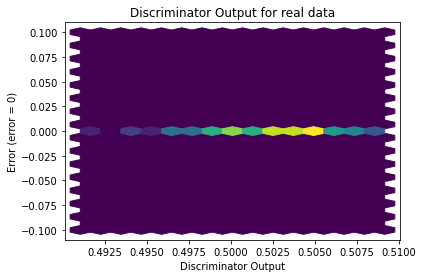

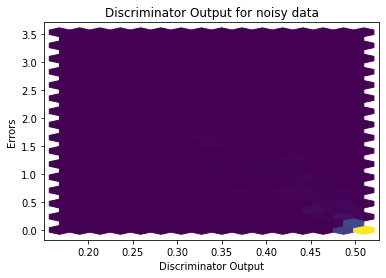

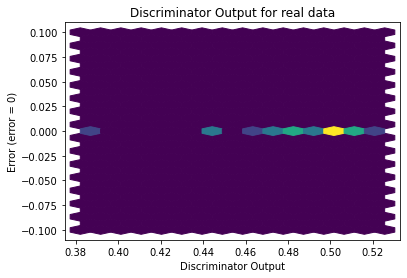

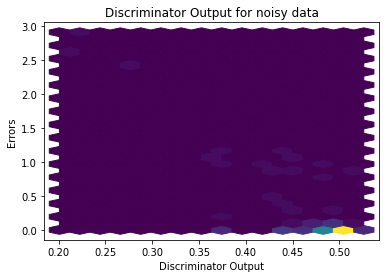

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1502]], requires_grad=True)
